# Load and Preprocess the Data
## Import Time.

In [217]:
import tensorflow as tf
# Note, had some trouble importing keras over here, so the code creating the models is a bit wordy, but it's the same 
# thing as usual code
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [219]:
# On my system, running this throws an error. That's why I'll be using tensorflow.xyz.xyz.xyz
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'tensorflow.keras'

In [309]:
# NOTE! This code took around 10-15 minutes to load for me

path = 'alphabets_dataset/alphabet_images'
sorted_filenames = sorted(os.listdir(path))
image_list = []
reference = 0
for image in sorted_filenames:
    # Chosing to use Pillow / Image module instead of OpenCV so as to get used to using these modules for more general purposes.
    img = Image.open(os.path.join(path, image))
    img = img.resize((28, 28))
    img = np.array(img)
    image_list.append(img)
    if reference % 1000 == 0:
        print(reference)
    reference += 1

image_list = np.array(image_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


## Preprocessing

In [311]:
# Reading just the labels
labels_df = pd.read_csv('alphabets_dataset/alphabet_labels.csv')

labels_df = labels_df.sort_values(by='file')
labels = labels_df['label'].values
print(type(labels))

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels = labels_encoded

print(f"Images' shape: {image_list.shape}")
print(f"Labels' shape: {labels.shape}")

<class 'numpy.ndarray'>
Images' shape: (372451, 28, 28)
Labels' shape: (372451,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  24  26   8
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  51 175 180  64
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10 130 239 231 108
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2  43 206 254 233 120
    6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 143 246 255 240 151
   10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18 105 231 252 25

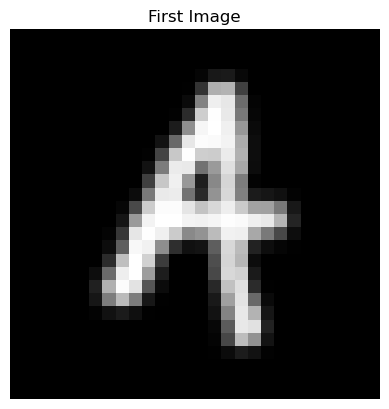

In [312]:
print(image_list[0])
plt.imshow(image_list_copy[0], cmap='gray')
plt.title('First Image')
plt.axis('off')
plt.show()

In [313]:
X_train, X_test, y_train, y_test = train_test_split(image_list, labels, test_size=0.2, random_state=45)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Train data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Train data shape: (297960, 28, 28), Labels shape: (297960,)
Test data shape: (74491, 28, 28), Labels shape: (74491,)


# Creating the CNN
We set the input size as 28x28 (for ease to work with) and we don't set too many convolutional layers since the problem does not have too much complexity (with more layers, likelihood of overfitting increases). Then setting number of perceptrons / filters to be some power of 2, but not too large so as to prevent overfitting. Then we use the Adam optimizer for the gradient descent and sparse_categorical_crossentropy as the loss metric as it's a multiple option classification problem.

In [315]:
# Define CNN model architecture
# Chosing not to put dropout layers as the model is not overfitting
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(27, activation='softmax')  # 26 classes (assuming one for each alphabet) (and one for non-alphabets (will be useful later))
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=8, batch_size=500, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 302s 501ms/step - accuracy: 0.7424 - loss: 0.9264 - val_accuracy: 0.9697 - val_loss: 0.1106
Epoch 2/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 320s 537ms/step - accuracy: 0.9726 - loss: 0.0991 - val_accuracy: 0.9767 - val_loss: 0.0859
Epoch 3/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 231s 387ms/step - accuracy: 0.9805 - loss: 0.0705 - val_accuracy: 0.9825 - val_loss: 0.0660
Epoch 4/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 201s 338ms/step - accuracy: 0.9841 - loss: 0.0582 - val_accuracy: 0.9834 - val_loss: 0.0606
Epoch 5/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 222s 372ms/step - accuracy: 0.9863 - loss: 0.0480 - val_accuracy: 0.9864 - val_loss: 0.0512
Epoch 6/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 230s 385ms/step - accuracy: 0.9877 - loss: 0.0429 - val_accuracy: 0.9873 - val_loss: 0.0471
Epoch 7/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 298s 500ms/step - accuracy: 0.9888 - loss: 0.0385 - val_accuracy: 0.9877 - val_loss: 0.0454
Epoch 8/8
596/596 ━━━━━━━━━━━━━━━━━━━━ 259s 393ms/step - accuracy: 0.9905 - loss: 0

Do note. Some of the lack in accuracy could be caused by mistakes in the dataset too, so this accuracy should be taken with a pinch of salt. But 98.5% is still a very high value and can be believed with reasonably good confidence in a general scenario (unless it's my handwriting 😉).

## Further ideas to implement for the classification model

- Create an image generator based on the dataset and see how the model works on those images.
- Use a dummy regressor for the alphabet classification model (not particularly required due to evidently good enough results) But. If someone wanted, it's simply
(https://www.codecademy.com/paths/build-deep-learning-models-with-tensorflow/tracks/dlsp-getting-started-with-tensorflow/modules/dlsp-implementing-neural-networks/lessons/hyperparameter-tuning-neural/exercises/baselines-neural-network) 
- (NOT DOING! Since overfitting not happening) Dropout Layers (https://www.codecademy.com/paths/build-deep-learning-models-with-tensorflow/tracks/dlsp-getting-started-with-tensorflow/modules/dlsp-implementing-neural-networks/lessons/hyperparameter-tuning-neural/exercises/regularization-dropout)
- Grid Search or Randomized Search (batch size, (learning_rate?), (and maybe neuron shape?) (will try if I get time to run the code 🫠)
- Some graphs to show learning and train and test error (https://www.codecademy.com/paths/build-deep-learning-models-with-tensorflow/tracks/dlsp-getting-started-with-tensorflow/modules/dlsp-implementing-neural-networks/lessons/hyperparameter-tuning-neural/exercises/tuning-epochs-early-stopping) (the link has some sample data I can use)

# Inputting Text From Image
## Basic Version
The given images are in a grid format. If we can assume each alphabet to be 28x28 grid, the process simplifies to splitting the grid into 28x28 grids, running the model on the grid, and appending it to a list or something. 

Then, the main issue is how to tackle the spaces, one idea is to just look for a blank grid. The other is to change the last dense layer to have 27 possible outputs instead of the original 26. Considering the confidence level of the model, when inputted a blank grid, they will not have much confidence and assign the 27th option to some minimal probability. We can just check for that.

Pseudocode:
1. Take all target images input and store it in a np array (like we did for the training images earlier)
2. Make a function that takes the image, cuts it up using a library (a good option looks like cv2 or image_slicer) and returns them in a list. (image_slicer looks more intuitive to use, but it stores images as an Image object, that need to be converted to a numpy array which is simple business).
3. Make a list to store sentences.
4. (decide how to tackle spaces)

Let's test our model on the blank image and see what happens. So first let's split the image itself.

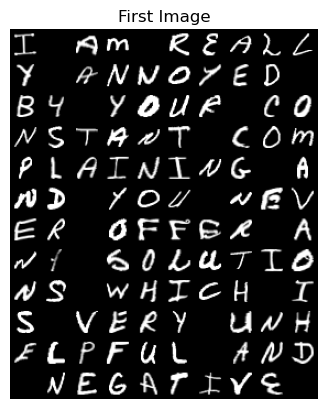

Shape of the first image: (336, 280)


In [316]:
path = 'target_images'
sorted_target_filenames = sorted(os.listdir(path))
target_image_list = []
for image in sorted_target_filenames:
    img = Image.open(os.path.join(path, image))
    img = np.array(img)
    target_image_list.append(img)

plt.imshow(target_image_list[0], cmap='gray')
plt.title('First Image')
plt.axis('off')
plt.show()

# Check the shape of the first image to confirm it has not been resized
print(f'Shape of the first image: {target_image_list[0].shape}')

Now let's try finding the words. A very basic method of grabbing the letters, would be to split it as a grid (which the test images are gracefully set as) in 28x28 squares. In a more general scenario, the letters won't always be in a nice grid format and we'd need some way to detect the letters without any assumptions. But here, the images have dimensions that are multiples of 28, so it's a simple solution.

But for a general solution, this is where, the idea of contour identification comes in. It's basically detecting where borders of objects in an image are located, OpenCV has a built in function for this (which even sets the boundary box based on the contour), and using that (the x, y, width and height values), we can find each of the letters and spot spaces when the distance between two contour boxes is >= the width of an average letter. 

https://www.freedomvc.com/index.php/2021/06/26/contours-and-bounding-boxes/ (this link explains it nicely, I'll implement this if I get the time)

I chose to implement the more basic method despite having the other approach for two (very basic) reasons. One is lack of time to implement, the other is for the problem statement at hand, the simple approach is the best approach.

336


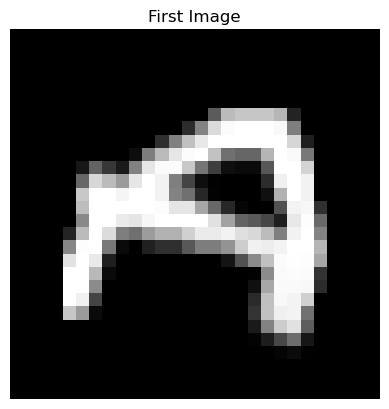

In [317]:
tiles = []
print(target_image_list[0].shape[0])
for r in range(0,target_image_list[0].shape[0],28):
    for c in range(0,target_image_list[0].shape[1],28):
        tiles.append(target_image_list[0][r:r+28, c:c+28])

plt.imshow(tiles[2], cmap='gray')
plt.title('First Image')
plt.axis('off')
plt.show()

It's working! 

Let's run the model on the letter (and check for space first, and append it to a list). An interesting thought experiment, what would happen if we ran the model on a blank space. (Is it recreatable? Is this a viable method to detect spaces?) Let's see.

(1, 28, 28)


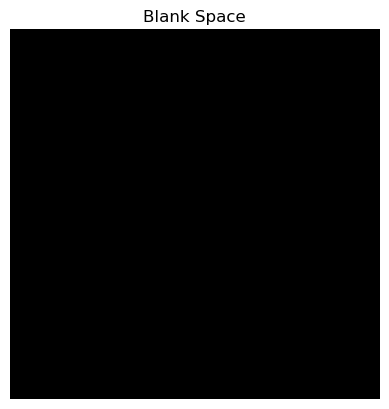

In [318]:
pred_img = np.expand_dims(tiles[1], 0)
print(pred_img.shape)

plt.imshow(tiles[1], cmap='gray')
plt.title('Blank Space')
plt.axis('off')
plt.show()

In [319]:
my_prediction = cnn_model.predict(pred_img)
my_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


array([[2.4108964e-04, 7.2805898e-04, 1.7081305e-01, 3.7818094e-04,
        2.3750917e-03, 1.9791640e-02, 7.5452365e-03, 2.0368070e-04,
        2.5317594e-03, 4.0906664e-02, 7.5032702e-03, 1.7004228e-01,
        1.1566177e-02, 1.6771950e-03, 7.9805002e-04, 2.0053526e-03,
        2.9768638e-04, 2.1618702e-04, 3.2271009e-02, 4.3916538e-01,
        2.7950560e-03, 1.0480115e-04, 1.0487589e-03, 1.0182478e-02,
        2.1392085e-02, 5.3295761e-02, 1.2403121e-04]], dtype=float32)

This output seems to be constant as long as 28x28 full black grid is received. So it seems like a reasonable way to detect spaces. But. This is not a great generalization, a comma, a full stop, anything else would give more varied results. But something we can say with relatively high confidence, is that if it's not a [0 0 .. 0 1 0 .. 0 0] type array, then it's not an easily recognizable alphabet for sure. After that, the decision comes down to what to do when it isn't an alphabet. 

A way to detect other punctuation, would be if there was more labeled data provided, like for commas and fullstops, we can train the data on that too. But for now, let's move with the assumption that anything which isn't a letter, is a space.

Now let's bring this all together in a function.

In [321]:
def sentenceFromImage(target_image):
    sentence = ""
    tiles = []
    for r in range(0, target_image.shape[0], 28):
        for c in range(0, target_image.shape[1], 28):
            tiles.append(target_image[r:r+28, c:c+28])

    for image in tiles:
        # Convert image to right dimension and run model
        image = np.expand_dims(image, 0)
        my_prediction = cnn_model.predict(image, verbose=0)
        
        # First check if it's a space
        # Just check the 27th value since that should have been trained to give 0 for anything which looks remotely like a letter
        is_space = 0
        if my_prediction[0, -1] > 0: 
            is_space = 1

        if (not is_space):
            letter_index = np.argmax(my_prediction)
            sentence += chr(65 + letter_index)
        else:
            sentence += " "

    return sentence

print(sentenceFromImage(target_image_list[0]))

I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHECPFUL AND NEGATIVE 


## Generalized Version
For the generalized version (will code it out if I get time), we need to consider what a general scenario will look like.

In my eyes, the target images given are not general case scenarios as a word will not usually stretch across two lines unless there was a hyphen in between. Due to lack of training data, our model cannot recognize hyphens. Thus, we must make the assumption that any time a new line happens, it is a new word. (this will give worse results, but we will have to do this if our goal is to have a general solution).

Then, since we don't have training data for other punctuation (mainly full stops), we must also assume a single sentence.

We'll be using the functions shown in this website:
https://www.freedomvc.com/index.php/2021/06/26/contours-and-bounding-boxes/ 

In this link, they find the contours, and then sort based on the area of the contours, and then they draw the largest bounding boxes. Instead, we'll set some minimum area bound for size of contours (sufficient to cover a letter), then get the bounding boxes, and sort based on y values, and then x values. Then, we go row by row, and resize each bounding box to 28x28 and run our model on it. The main issue (and only issue I can think of right now) is the lack of spaces. So, what we'll do is we'll add a space whenever the gap between two bounding boxes is greater than the median width of a letter (or in this case, the median width of a bounding box). And after each line, hit another space (if there are two consecutive spaces, that can be handled in post processing), and we should get our sentence.

(in the possibility that the contours are getting too specific and detecting specific parts of a letter (like for 'A', it detects a triangle and two lines), a possible solution is to blur the image so that the openCV gets the rough idea for where letters are, and then it can run the model from there.

### Psuedo Code
1. for row in rows
2.   set sentence = ""
3.   Get a copy of the image but blurred
4.   get list of all contours of the blurred image
5.   set a minimum area (will have to be done by trial and error to find optimal for general usage (mostly based on expected font size))
6.   select the specific contours greater than minimum area
7.   convert all contours to bounding boxes
8.   sort by y
9.   sub sort by x for same y
10.  go bounding box by bounding box (always checking for spaces) and run the model (using the non-blurred image)
11.  add the letter (or space) to sentence.
12.  Tada!

### Assumption work arounds

If we don't make the assumption about "New line, new word", then the issue that arises is once a line finishes, we need to figure out whether a new word has started or not. But this is ambiguous territory as compound words, like "Butterfly", if it were split into two lines, a human being also wouldn't be able to tell if it's two words or one (without contextual knowledge). But a possible fix (for a human and an ML algorithm) would be if there was a clearly visible space after "butter" and before the line ends.

So to code the solution out, whenever a new line starts, and the first letter is right at the left edge, we look at the previous line and see if there was a gap of a letter size width. If there was, we assume a space, otherwise we take it as a single word.

### Flaws with the method
- Any background data, like an elephant picture or whatever, will throw our algorithm out the window. Haven't thought of a solution yet.
- Diagonal (or even slanted) lines of text may also throw the algorithm off as we're sorting by y values first.

Also... I didn't get the time to implement this from lack of time (due to personal reasons), with a bit more time, it would be doable.

# Sentiment Analysis
We'll be using Recurrent Neural Networks (LSTMs) to estimate the sentiment of the given sentences. The reason for using this method is mainly because the data provided is in a sequential form and RNNs are meant for this type of data. Then we use LSTMs to handle the vanishing gradient problem (which is basically when the gradients of the loss function wrt the model parameters become very small during backpropogation leading to very slow or even a stop in learning in the earlier layers of the network). LSTMs allow information from long before the current data to be used optimal and also doesn't allow the gradient to rise over certain bounds. It's also a lot more memory efficient.

## Import Time. (+ some downloading)

In [322]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/fa0296/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fa0296/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/fa0296/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fa0296/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [220]:
# On my system, running this import throws an error, I hope this clarifies why I've used the more wordy versions to 
# write my model and create the word sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'tensorflow.keras'

In [211]:
# Load data
df = pd.read_csv('sentiment_analysis_dataset.csv')

## Preprocessing
### Lemmatizing
Basically, the simple way to show why this is needed is, we may have tagged the word "annoying" with a certain tag. Then if we come across another sentence with the word, "annoys", then the previous knowledge that "annoying" isn't a great word doesn't come out. Thus, we identify which Part of Speech it is, and then convert it to it's root word. 
### POS Tagging
But we need the Part of Speech to be able to identify this. We will be using NLTK and WordNet to detect part of speech and then use wordnet's vast database to convert it to it's root form.
### Stop Words
These are words that aren't very singificant to the sentiment value, we simply ignore them.

After both of these steps, combine the new version of the words and combine it together into the final form of the sentence.

In [348]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# This is to integrate NLTK's parts of speech and the lemmatizer tool.
def get_wordnet_pos(word):
    # Get the tag of the word using nltk (note that nltk has it's own rules to handle unknown words)
    tag = nltk.pos_tag([word])[0][1][0].upper()
    # Using a dictionary instead of nested if else's or switch's.
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    # Returns the wordnet.<POS> if the tag is one among the ones listed, or else return it as a noun. 
    return tag_dict.get(tag, wordnet.NOUN)

# Preprocess function
def preprocess(text):
    # Splits the text into words
    tokens = word_tokenize(text)
    # Ignores stop words, and converts each token (word) into it's root word (or leaves it as is if it's an unknown word)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens if token.lower() not in stop_words]
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the 'line' column
df['processed_line'] = df['line'].apply(preprocess)

# print(preprocess("This Sudoku game is so fun and enjoyabale and I have so much joy from this game"))
print(df.head())

                                                line  sentiment  \
0  I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY ...          0   
1  IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSI...          0   
2  I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE A...          0   
3  IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETING...          0   
4  I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHIN...          0   

                                      processed_line  
0  REALLY FRUSTRATED CONSTANTLY IGNORE MESSAGES N...  
1  MAKES UPSET NEVER TAKE RESPONSIBILITY ACTIONS ...  
2  BELIEVE MISSED ANOTHER DEADLINE LACK ATTENTION...  
3  ANNOYS INTERRUPT MEETINGS NEVER LET ANYONE FIN...  
4  TIRED EXCUSES EVERY TIME SOMETHING GOES WRONG ...  


In [376]:
# Encode labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_line'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize text data
max_words = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences

# test_seq = tokenizer.texts_to_sequences(["I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY IGNORE MY MESSAGES AND YOU NEVER RESPOND ON TIME WHICH MAKES IT VERY HARD TO GET ANYTHING DONE", "I APPRECIATE HOW YOU ALWAYS OFFER TO HELP AND YOUR WILLINGNESS TO ASSIST OTHERS IS TRULY ADMIRABLE AND MAKES EVERYTHING EASIER"])
# print(test_seq)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for equal length
maxlen = 10
# test_pad = tf.keras.preprocessing.sequence.pad_sequences(test_seq, maxlen=maxlen)
# print(test_pad)
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=maxlen)
print(X_train_pad.shape)
print(y_train.shape)
print(X_test_pad.shape)
print(y_test.shape)

(24, 10)
(24,)
(6, 10)
(6,)


## Making the model
Here, I've made an embedding layer to take the words and convert it to a dense vector sequence for each word in the input. Then I've added just one LSTM layer, so as to not overfit, and set a dropout of 0.2 as well. 

In [388]:
embedding_dim = 100

lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.Embedding(max_words, 100))
lstm_model.add(tf.keras.layers.LSTM(units=32, dropout=0.2))
lstm_model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [389]:
epochs = 6
batch_size = 3
history = lstm_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test))

loss, accuracy = lstm_model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.4945 - loss: 1.0975 - val_accuracy: 0.6667 - val_loss: 1.0954
Epoch 2/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8983 - loss: 1.0726 - val_accuracy: 0.5000 - val_loss: 1.0888
Epoch 3/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8450 - loss: 1.0521 - val_accuracy: 0.5000 - val_loss: 1.0783
Epoch 4/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 1.0184 - val_accuracy: 0.6667 - val_loss: 1.0623
Epoch 5/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.9484 - val_accuracy: 0.6667 - val_loss: 1.0366
Epoch 6/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.8501 - val_accuracy: 0.6667 - val_loss: 1.0123
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - accuracy: 0.6667 - loss: 1.0123
Test Accuracy: 0.6667


In [390]:
print(lstm_model.summary())

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_42 (Embedding)        │ (3, 10, 100)           │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (3, 32)                │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (3, 3)                 │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,371 (1.34 MB)

 Trainable params: 117,123 (457.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 234,248 (915.04 KB)

None


## Results
The model is not performing so well on the dataset. This could be because there is insufficient data to work with. The data also seems to be overfitting onto the training data as seen by the 1.0000 accuracy. Right now, I can't come up with a viable alternative (other than maybe use naive bayes, getting more data, or trying multi-modals) (unless there's something missing in my code which I can't find 😭)

## Function

In [391]:
def sentimentFromImage(sentence):
    # Preprocess and tokenize and give padding to the sentence
    preprocessed_sentence = preprocess(sentence)
    sequences = tokenizer.texts_to_sequences([preprocessed_sentence])
    test_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = maxlen)

    # Run the model
    prediction = lstm_model.predict(test_sequence)
    print(prediction)

    # Find out the sentiment
    prediction = np.argmax(prediction,axis=1)
    predicted_labels = label_encoder.inverse_transform(prediction)
    return predicted_labels

# Bringing Everything Together
Now let's take the test images provided and run the entire pipeline. 

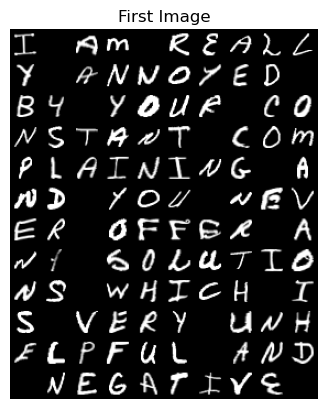

Shape of the first image: (336, 280)


In [392]:
path = 'target_images'
sorted_target_filenames = sorted(os.listdir(path))
target_image_list = []
for image in sorted_target_filenames:
    img = Image.open(os.path.join(path, image))
    img = np.array(img)
    target_image_list.append(img)

plt.imshow(target_image_list[0], cmap='gray')
plt.title('First Image')
plt.axis('off')
plt.show()

# Check the shape of the first image to confirm it has not been resized
print(f'Shape of the first image: {target_image_list[0].shape}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.30454403 0.4864992  0.2089568 ]]


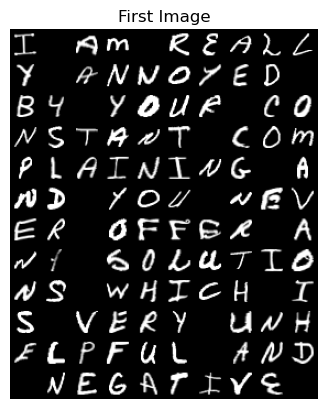

The above image says: I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHECPFUL AND NEGATIVE  and has a sentiment of [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.3470685  0.43963847 0.21329308]]


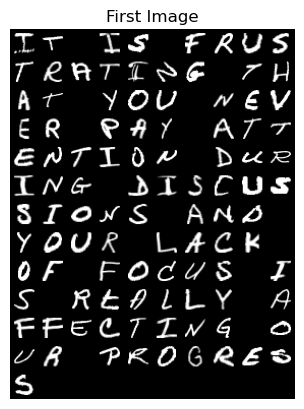

The above image says: IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS          and has a sentiment of [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.2880319  0.4764555  0.23551255]]


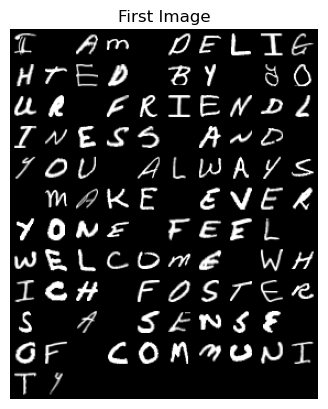

The above image says: I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY         and has a sentiment of [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.2906187  0.5034136  0.20596768]]


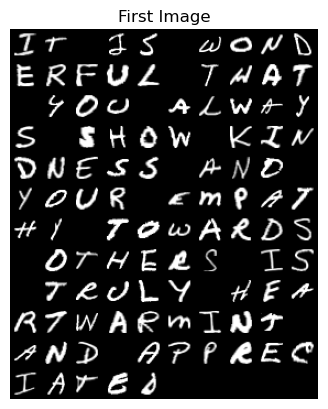

The above image says: IT JS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS ANO YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINJ AND APPRECIATED      and has a sentiment of [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.27329555 0.44938943 0.27731502]]


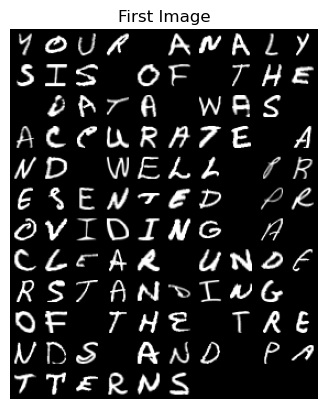

The above image says: YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TRENDS AND PATTERNS     and has a sentiment of [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.28449997 0.45690566 0.25859436]]


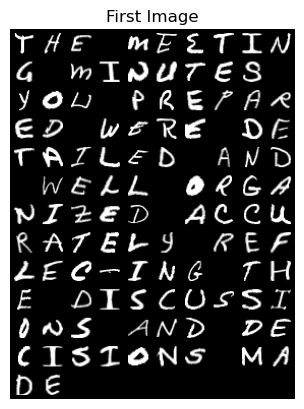

The above image says: THE MEETING MINUTES YOU PREPARED WERE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE         and has a sentiment of [1]


In [401]:
for image in target_image_list:
    # First convert it to text form
    text = sentenceFromImage(image)
    # Find the sentiment
    sentiment = sentimentFromImage(text)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title('First Image')
    plt.axis('off')
    plt.show()
    # Result
    print(f'The above image says: {text} and has a sentiment of {sentiment}')

(maybe a comfort to me, is that the model seems to be predicting most things to a neutral state, but looking at whether the negative or the positive sentiment was higher, we can see that it seems to work to some degree. Just a small rose in bush of thorns I suppose 🥲)

# Final Conclusions
The goal of the task was to take an image with handwritten letters in it and to convert it into a sentence and finally implement a sentiment analysis on that sentence. 

The CNN that we made to predict the letter performs reasonably well. Possibly a clearer picture on what exactly this "reasonably well" is, would have been a good improvement (via some plots, etc.).

Then, to extract the text from the image, we had to find where the letters would be in the image. I implemented a simple approach of just cutting up the image into a grid, BUT, this is not the ideal generalized approach. I have put forth an explanation on how I would go about doing it, as well as some small pseudocode, I was unfortunately not able to put forward a working implementation due to lack of time. This is something that could have been a good improvement.

Finally, as a sentiment analysis, I implemented a method using LSTMs, but as the dataset was very small, I had to extract the most information possible. Which is why I used POS tagging and Lemmatization to get to the crux of each sentence. Unfortunately, no matter the hyperparameters I change, it either just overfits, or performs terribly. Maybe a larger dataset would end in the code working better, but right now, can't say for sure. Possible improvements here would have been to find an alternative solution, or maybe use a simpler method since the dataset was small and the test data was a simple one. I also could have put a bit more time into reasearching multi-modals and try implementing that.

I learnt a lot in this project in the end tho :)

# References
- For cutting up the image (that stackoverflow page which I can't find)
- www.codecademy.com (for most of my learning about ML)
- The OpenCV stuff for contour and boundary box detection (https://www.freedomvc.com/index.php/2021/06/26/contours-and-bounding-boxes/)
- To learn sentiment analysis implementation: https://www.youtube.com/watch?v=Nk8nM2anJTw&ab_channel=StudyGyaan
- GPT for teaching more sentiment analysis, as well as fixing and simplifying my code :)

# Temp Code Below

In [159]:
test_img = cv2.imread('alphabets_dataset/alphabet_images/image_1.png')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(img, (28, 28))
print(type(test_img))

<class 'numpy.ndarray'>


In [400]:
prediction = [[1,2,3]]
prediction = np.argmax(prediction,axis=1)
print(prediction)
label_encoder.inverse_transform(prediction)

[2]


array([2])